<a href="https://colab.research.google.com/github/santiagoprado12/cursoMLpython/blob/main/Regresion_lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelos de Regresion Lineal
## Modelo con datos simulados
* y=a+b*x

* x=100 valores distribuidos segun una N(1.5 , 2.5)


* ye=12+0.6*x+e

* r estara distribuido segun una normal N (0 , 0.8)

In [1]:
import pandas as pd
import numpy as np

In [2]:
x= 1.5 + 2.5 * np.random.randn(100)

In [3]:
res = 0 + 0.8*np.random.randn(100)

In [4]:
y_pred= 4+2*x

In [5]:
y_act= 4+2*x+res

In [6]:
x_list=x.tolist()
y_pred_list=y_pred.tolist()
y_act_list=y_act.tolist()

In [7]:
data=pd.DataFrame(
    {
        "x": x_list,
        "y":y_act_list,
        "y_prediccion":y_pred_list
    }
)

In [8]:
data.head()

,x,y,y_prediccion
0,0.691708,4.674259,5.383415
1,2.171155,8.958153,8.342309
2,-0.825821,3.646285,2.348357
3,2.867573,9.542268,9.735146
4,1.960850,8.075239,7.921700


In [9]:
import matplotlib.pyplot as plt

In [10]:
y_mean=[np.mean(y_act) for i in range(1,len(x_list)+1)]

Text(0.5, 1.0, 'Valor Actual vs Prediccion')

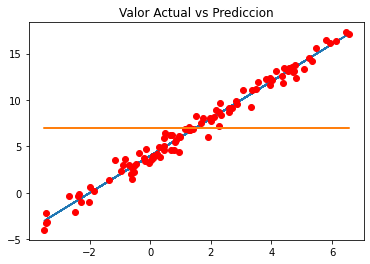

In [11]:
%matplotlib inline
plt.plot(x,y_pred)
plt.plot(x, y_act,"ro")
plt.plot(x, y_mean)
plt.title("Valor Actual vs Prediccion")

In [12]:
data["SSR"]=(data['y_prediccion']-np.mean(y_act))**2
data["SSD"]=(data["y_prediccion"]-data["y"])**2
data["SST"]=(data["y"]-np.mean(y_act))**2

In [13]:
SSR=sum(data["SSR"])
SSD=sum(data["SSD"])
SST=sum(data["SST"])

In [14]:
SSR

2530.003861338269

In [15]:
SSD

47.40886878903376

In [16]:
SST

2569.818676805198

In [17]:
R2=SSR/SST

In [18]:
R2

0.9845067607974479

(array([ 1.,  3., 13., 12., 25., 21., 11.,  8.,  4.,  2.]),
 array([-1.85935648, -1.49113184, -1.12290719, -0.75468255, -0.3864579 ,
        -0.01823326,  0.34999139,  0.71821603,  1.08644068,  1.45466532,
         1.82288997]),
 <BarContainer object of 10 artists>)

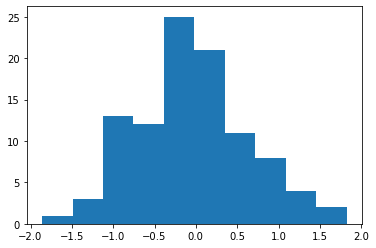

In [19]:
plt.hist(data["y_prediccion"]-data["y"])

#Obteniendo la recta de regresion
* y=a+b*x
* b=sum((xi-x_m)*(y_i-y_m))/sum((xi-x_m)^2)
* a= y_m-b*x_m

In [20]:
x_mean=np.mean(data["x"])
y_mean=np.mean(data["y"])
x_mean, y_mean

(1.4759579730817558, 6.995678765649475)

In [21]:
data["beta_n"]=(data["x"]-x_mean)*(data["y"]-y_mean)
data["beta_d"]=(data["x"]-x_mean)**2

In [22]:
beta=sum(data["beta_n"])/sum(data["beta_d"])

In [23]:
alpha=y_mean-beta*x_mean

In [24]:
#El modelo lineal obtenido por regresion
alpha,beta

(4.047969913047925, 1.9971495844470575)

In [25]:
data["y_model"]=alpha+beta*data["x"]

In [26]:
data.head()

,x,y,y_prediccion,SSR,SSD,SST,beta_n,beta_d,y_model
0,0.691708,4.674259,5.383415,2.599393,0.502904,5.388992,1.820574,0.615048,5.429414
1,2.171155,8.958153,8.342309,1.813414,0.379264,3.851307,1.364306,0.483299,8.384091
2,-0.825821,3.646285,2.348357,21.597595,1.684617,11.218436,7.709564,5.298188,2.398681
3,2.867573,9.542268,9.735146,7.504681,0.037202,6.485115,3.543871,1.936592,9.774942
4,1.960850,8.075239,7.921700,0.857515,0.023574,1.165449,0.523470,0.235120,7.964081


In [27]:
SSR=sum((data['y_model']-y_mean)**2)
SSD=sum((data["y_model"]-data["y"])**2)
SST=sum((data["y"]-y_mean)**2)

In [28]:
SSR, SSD, SST

(2522.6064650514595, 47.21221175373855, 2569.818676805198)

In [29]:
R2=SSR/SST
R2

0.9816281933897248

Text(0.5, 1.0, 'Valor Actual vs Prediccion')

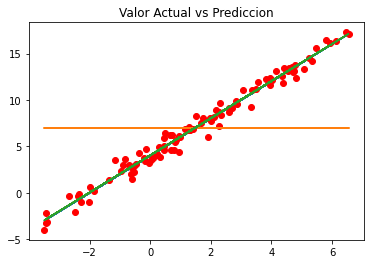

In [30]:
%matplotlib inline
y_mean=[np.mean(y_act) for i in range(1,len(x_list)+1)]
plt.plot(x,y_pred)
plt.plot(x, y_act,"ro")
plt.plot(x, y_mean)
plt.plot(x, data["y_model"])
plt.title("Valor Actual vs Prediccion")

# Error estandar de los residuos (RSE)

In [32]:
RSE=np.sqrt(SSD/len((data)-2))
RSE

0.6871114302188441

In [33]:
np.mean(data["y"])

6.995678765649475

In [34]:
RSE/np.mean(data["y"])

0.09821940847151707